# Chapter 2
## The perceptron


    Hand-in bug-free (try "Kernel" > "Restart & Run All") and including all (textual as well as figural) output via Blackboard before the deadline (see Blackboard).
    
Learning goals:
1. Implement a perceptron. 

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### Exercise 1: The activation function (1 point)
The perceptron uses the *linear threshold activation* function $g(\mathbf{x})$ with $\theta=0$. Write a function ```linear_threshold(x, theta)``` that computes this activation given any input $x$.

### Solution 1

In [157]:
def linear_treshold(x,theta=0):
    if x>=theta:
        return 1
    else:
        return 0

In [158]:
linear_treshold(-1)

0

### Exercise 2: Perceptron output (1 point)
The output $y$ of a perceptron is given by $y=g(\mathbf{w}^\top \mathbf{x})$, with input vector $\mathbf{x}$, the weight vector $\mathbf{w}$, and the activation function $g$. Write a function ```compute_output(x,w)``` that computes the output of a perceptron, given a single pattern $\mathbf{x}$ and the current perceptron weights $\mathbf{w}$.

### Solution 2

In [200]:
def compute_output(x,w):
    activation_input=np.dot(x,w)
    return linear_treshold(activation_input)
    


In [201]:
x_inputs = np.array([4.0,2.0,3.0])
weights  = np.array([-0.7,-0.3,-0.2])
compute_output(x_inputs,weights)

0

### Exercise 3: Weight update (1 point)
A perceptron is trained (i.e. it learns the right weights) following the perceptron convergence procedure. Write a function ```update_weights(w, x, y, t)``` that performs this procedure. Specifically, write a function that returns the updated perceptron weights following the rule from the lecture, given one input pattern $\mathbf{x}$, its target output $\mathbf{t}$, the current set of weights $\mathbf{w}$ and the (already calculated) output of the perceptron $\mathbf{y}$. 

You don't need to calculate the perceptron output $\mathbf{y}$ here, it will be calculated in the final perceptron training function with your ```compute_output()``` function. 

Hint: This is a very short function again. 

### Solution 3

In [218]:
def update_weights(w,x,y,t):
    updated_weights=[]
    if y==1 and t==0:
        updated_weights=[z - y for z, y in zip(w, x)]
        
    elif y==0 and t==1:
        updated_weights=[z + y for z, y in zip(w, x)]
    
    else:
        updated_weights=list(w)
        
    return updated_weights

### Exercise 4: Training (1.5 points)
You now have implemented all the building blocks for a perceptron. Now, write a function ```perceptron_train(X, T, num_epochs)``` that trains and returns weights $\mathbf{w}$ for a perceptron, given a dataset $\mathbf{X}$ and targets $\mathbf{T}$.

`n` is the number of training examples. `m` is the number of weights. Expect $\mathbf{X}$ to be a matrix containing the training examples with dimensions `(m,n)` and $\mathbf{T}$ containing the targets for each example, a vector with length `n`.

It should train for 10 epochs (iterations over all training examples). Make use of `np.random.permutation` to avoid that you are always iterating over the examples in the same order. 

For now only implement ```perceptron_train(X, T, num_epochs)```. We will call and test it later. 

### Solution 4

In [213]:
def perceptron_train(X, T, num_epochs=10):
    m, n = X.shape
    print(m,n)
    # Initialize the right number of weights as zeros
    w=np.zeros(m)
    # Loop over epochs
    for i in range(0,num_epochs):
        # Loop over all examples in random order
        for index in range(0,n):
            # Take an example

            x=X[0:m,index]

            # Compute the output of the perceptron
            y=compute_output(x,w)
            # Update the weights of the perceptron
            
            w=update_weights(w,x,y,T[index])
            
    return w

### Exercise 5: Testing (1.5 points)
In addition to the training function, write a function `perceptron_test(X,w)` that computes and returns the outputs $\mathbf{Y}$ for a given dataset $\mathbf{X}$ and a perceptron given by its weights $\mathbf{w}$. 

### Solution 5

In [216]:
def perceptron_test(X, w):
    n = X.shape[1]
    
    # Create an output array Y that you use to store the perceptron outputs
    Y=[]
    # Loop over the examples
    for index in range(0,n):
        # Take an example
        x=X[0:n,index]
        # Compute the output of the perceptron
        Y.append(compute_output(x,w))
        
    return Y

### Exercise 6: OR (1 point)
Use your functions to train and test a perceptron on the OR problem, given by input patterns $\mathbf{X}$ and targets $\mathbf{T}$. 

Print your trained perceptron's outputs $\mathbf{Y}$ and the expected outputs $\mathbf{T}$ for the OR problem  to check whether your perceptron has learned successfully. 

In [220]:
# Inputs
X = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]], dtype="float32").T

# Targets
T = np.array([0, 1, 1, 1], dtype="float32")

In [221]:
w=perceptron_train(X, T, num_epochs=10)

(2L, 4L)


In [222]:
y=perceptron_test(X, w)

In [223]:
y

[0, 1, 1, 1]

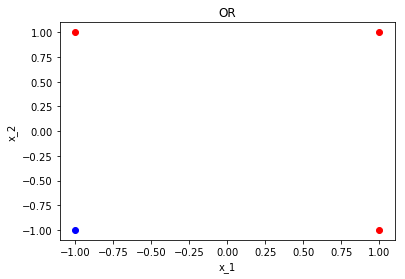

In [148]:
# Plot data
plt.figure()
for i_example in range(X.shape[1]):
    if T[i_example] == 1:
        plt.plot(X[0, i_example], X[1, i_example], "or")
    else:
        plt.plot(X[0, i_example], X[1, i_example], "ob")
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.title("OR")

In [ ]:
# Add bias terms
X = np.vstack((np.ones((1, X.shape[1])), X))

### Solution 6

In [ ]:
# Train the perceptron

# Apply the perceptron

# Print predictions and targets


### Exercise 7: AND (1 point)
Train and test your perceptron on the AND problem, given by input patterns $\mathbf{X}$ and targets $\mathbf{T}$. 

Print your trained perceptron's outputs $\mathbf{Y}$ and the expected outputs for the AND problem $\mathbf{T}$ to check whether your perceptron has learned successfully. 

In [ ]:
# Inputs
X = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]], dtype="float32").T

# Targets
T = np.array([0, 0, 0, 1], dtype="float32")

In [ ]:
# Plot data
plt.figure()
for i_example in range(X.shape[1]):
    if T[i_example] == 1:
        plt.plot(X[0, i_example], X[1, i_example], "or")
    else:
        plt.plot(X[0, i_example], X[1, i_example], "ob")
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.title("AND")

In [ ]:
# Add bias terms
X = np.vstack((np.ones((1, X.shape[1])), X))

### Solution 7

In [ ]:
# Train the perceptron

# Apply the perceptron

# Print predictions and targets


### Exercise 8: XOR (1 point)
Train and test your perceptron on the XOR problem, given by input patterns $\mathbf{X}$ and targets $\mathbf{T}$. 

Print your trained perceptron's outputs $\mathbf{Y}$ and the expected outputs for the XOR problem $\mathbf{T}$ to check whether your perceptron has learned successfully. 

In [ ]:
# Inputs
X = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]], dtype="float32").T

# Targets
T = np.array([0, 1, 1, 0], dtype="float32")

In [ ]:
# Plot data
plt.figure()
for i_example in range(X.shape[1]):
    if T[i_example] == 1:
        plt.plot(X[0, i_example], X[1, i_example], "or")
    else:
        plt.plot(X[0, i_example], X[1, i_example], "ob")
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.title("XOR")

In [ ]:
# Add bias terms
X = np.vstack((np.ones((1, X.shape[1])), X))

### Solution 8

In [ ]:
# Train the perceptron

# Apply the perceptron

# Print predictions and targets


### Exercise 9: Interpretation (1 point)

1. Which of the three problems OR, AND and XOR did the perceptron learn, and which did it not learn?
1. Which property do the patterns in $\mathbf{X}$ need to have so that the perceptron can learn them? 
1. Which of the three problems do or do not have this property?

### Solution 9

1. Write your answer here.
1. Write your answer here.
1. Write your answer here.